### Importing Data

In [1]:
import pandas as pd
data=pd.read_json(r"C:\Users\laksh\Downloads\fashion_products_data.ldjson",lines=True)
df=pd.DataFrame(data)
df.head(2)

,uniq_id,crawl_timestamp,asin,product_url,product_name,image_urls__small,medium,large,browsenode,brand,...,colour,no__of_reviews,seller_name,seller_id,left_in_stock,no__of_offers,no__of_sellers,technical_details__k_v_pairs,formats___editions,name_of_author_for_books
0,26d41bdc1495de290bc8e6062d927729,2020-02-07 05:11:36 +0000,B07STS2W9T,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968255e+09,LA' Facon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,410c62298852e68f34c35560f2311e5a,2020-02-07 08:45:56 +0000,B07N6TD2WL,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968123e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uniq_id                        30000 non-null  object 
 1   crawl_timestamp                30000 non-null  object 
 2   asin                           30000 non-null  object 
 3   product_url                    30000 non-null  object 
 4   product_name                   30000 non-null  object 
 5   image_urls__small              29998 non-null  object 
 6   medium                         29998 non-null  object 
 7   large                          28841 non-null  object 
 8   browsenode                     29480 non-null  float64
 9   brand                          21857 non-null  object 
 10  sales_price                    27110 non-null  float64
 11  weight                         30000 non-null  object 
 12  rating                         30000 non-null 

In [3]:
df.describe()

,browsenode,sales_price,rating,no__of_reviews,left_in_stock,no__of_offers,no__of_sellers
count,2.948000e+04,27110.000000,30000.000000,3452.000000,3057.000000,1020.000000,1020.000000
mean,2.898248e+09,862.172397,4.039857,136.642236,2.091920,6.230392,6.230392
std,3.050401e+09,964.223008,0.840009,525.484988,1.317071,16.919507,16.919507
min,1.953148e+09,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.968067e+09,379.000000,3.500000,4.000000,1.000000,1.000000,1.000000
50%,1.968135e+09,590.000000,4.000000,15.000000,2.000000,2.500000,2.500000
75%,1.968444e+09,899.000000,4.900000,72.000000,3.000000,4.000000,4.000000
max,1.751625e+10,9988.000000,5.000000,9896.000000,5.000000,310.000000,310.000000


In [4]:
df.shape

(30000, 33)

In [5]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'asin', 'product_url', 'product_name',
       'image_urls__small', 'medium', 'large', 'browsenode', 'brand',
       'sales_price', 'weight', 'rating', 'sales_rank_in_parent_category',
       'sales_rank_in_child_category', 'delivery_type', 'meta_keywords',
       'amazon_prime__y_or_n', 'parent___child_category__all',
       'best_seller_tag__y_or_n', 'other_items_customers_buy',
       'product_details__k_v_pairs', 'discount_percentage', 'colour',
       'no__of_reviews', 'seller_name', 'seller_id', 'left_in_stock',
       'no__of_offers', 'no__of_sellers', 'technical_details__k_v_pairs',
       'formats___editions', 'name_of_author_for_books'],
      dtype='object')

In [6]:
# Select only the relevant columns
key_cols= ['asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand']

# Create a new DataFrame with only the relevant columns
df_main = df[key_cols]

# Show the updated DataFrame
df_main.head(2)


,asin,product_url,product_name,sales_price,rating,meta_keywords,medium,brand
0,B07STS2W9T,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,200.0,5.0,LA' Facon Cotton Kalamkari Handblock Saree Blo...,https://images-na.ssl-images-amazon.com/images...,LA' Facon
1,B07N6TD2WL,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,265.0,3.6,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,https://images-na.ssl-images-amazon.com/images...,NaN


In [7]:
df_main.columns

Index(['asin', 'product_url', 'product_name', 'sales_price', 'rating',
       'meta_keywords', 'medium', 'brand'],
      dtype='object')

In [8]:
print("Missing values count in each key column:")
df_main.isnull().sum()

Missing values count in each key column:


asin                0
product_url         0
product_name        0
sales_price      2890
rating              0
meta_keywords       0
medium              2
brand            8143
dtype: int64

#### Handling Missing values

In [9]:
# Fill missing sales prices with the median price
median_price = df_main['sales_price'].median()
df_main.loc[:, 'sales_price'] = df_main['sales_price'].fillna(median_price)

# Fill missing 'medium' URLs with a placeholder image link
df_main.loc[:, 'medium'] = df_main['medium'].fillna("https://via.placeholder.com/150")

# Fill missing brands with "Unknown"
df_main.loc[:, 'brand'] = df_main['brand'].fillna("Unknown")

# Check the updated missing values count
print("Updated missing values count in each key column after imputation:")
print(df_main.isnull().sum())


Updated missing values count in each key column after imputation:
asin             0
product_url      0
product_name     0
sales_price      0
rating           0
meta_keywords    0
medium           0
brand            0
dtype: int64


In [10]:
df['product_name'].head(50)

0     LA' Facon Cotton Kalamkari Handblock Saree Blo...
1     Sf Jeans By Pantaloons Men's Plain Slim fit T-...
2     LOVISTA Cotton Gota Patti Tassel Traditional P...
3              People Men's Printed Regular fit T-Shirt
4     Monte Carlo Grey Solid Cotton Blend Polo Colla...
5     Forest Club | Gym Wear | Sports Shorts| Shorts...
6     PrintOctopus Graphic Printed T-Shirt for Men C...
7       Pepe Jeans Men's Solid Regular fit Casual Shirt
8     Carahere Boys Handmade Pre-Tied Classic Polka ...
9                            Peppermint Synthetic Dress
10    Toddler Little Boy Straight Outta Timeout Long...
11               Puma Unisex Tribal Regular Fit T-Shirt
12    Jevi Prints Women's Cotton Printed Straight Ku...
13    OLLI Men's Orange, Lex Purple, White Cotton Br...
14    Pinkmint Women's Multi-Coloured Digital Print ...
15    Miss Chase Women's Solid Shoulder Cut-Out Half...
16                 bebe Women Genuine Leather Slim Belt
17                      Colt by Unlimited Men's 

#### Outlier detection

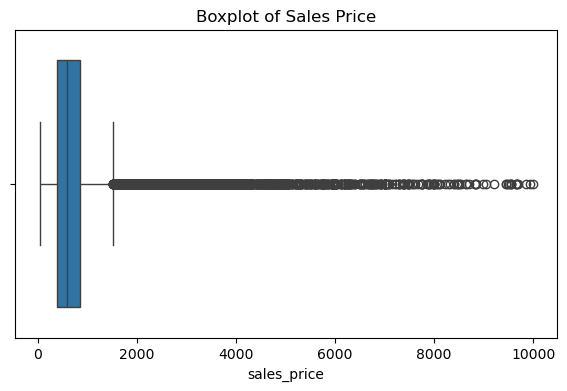

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing sales price distribution
plt.figure(figsize=(7, 4))
sns.boxplot(x=df_main['sales_price'])
plt.title('Boxplot of Sales Price')
plt.show()

#### outlier removal

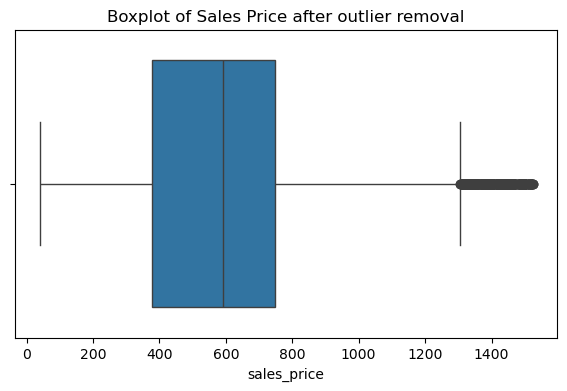

In [12]:
Q1 = df_main['sales_price'].quantile(0.25)
Q3 = df_main['sales_price'].quantile(0.75)
IQR = Q3 - Q1
df_main = df_main[(df_main['sales_price'] >= (Q1 - 1.5 * IQR)) & (df_main['sales_price'] <= (Q3 + 1.5 * IQR))]
# Visualizing sales price distribution
plt.figure(figsize=(7, 4))
sns.boxplot(x=df_main['sales_price'])
plt.title('Boxplot of Sales Price after outlier removal')
plt.show()

#### Sales Price Distribution

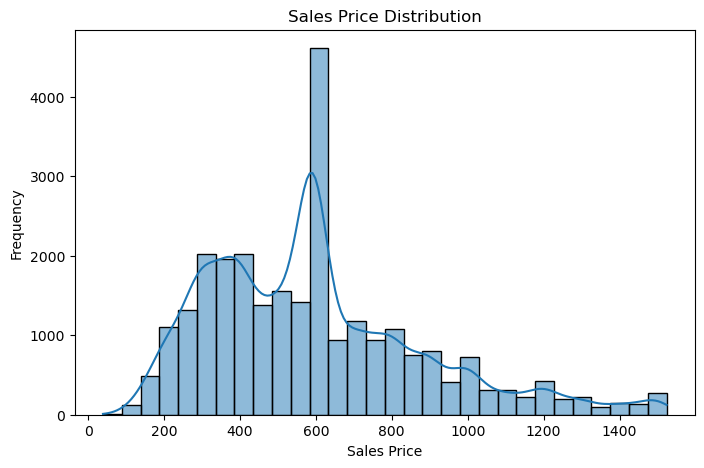

In [13]:
# Sales Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_main['sales_price'], bins=30, kde=True)
plt.title('Sales Price Distribution')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()


#### Top 10 Brands by Product Count

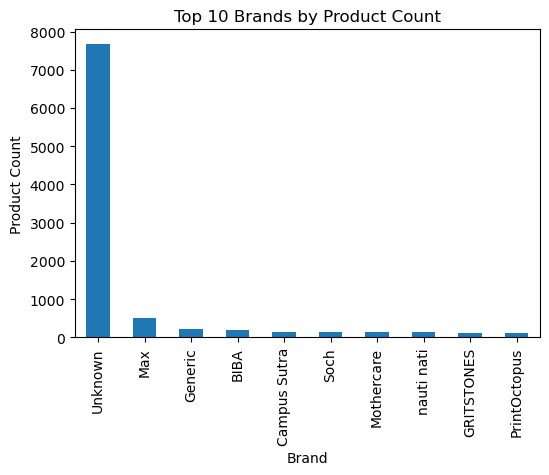

In [14]:
# Brand Distribution
plt.figure(figsize=(6,4))
top_brands = df_main['brand'].value_counts().head(10)
top_brands.plot(kind='bar')
plt.title('Top 10 Brands by Product Count')
plt.xlabel('Brand')
plt.ylabel('Product Count')
plt.show()


#### Sales Price vs Rating

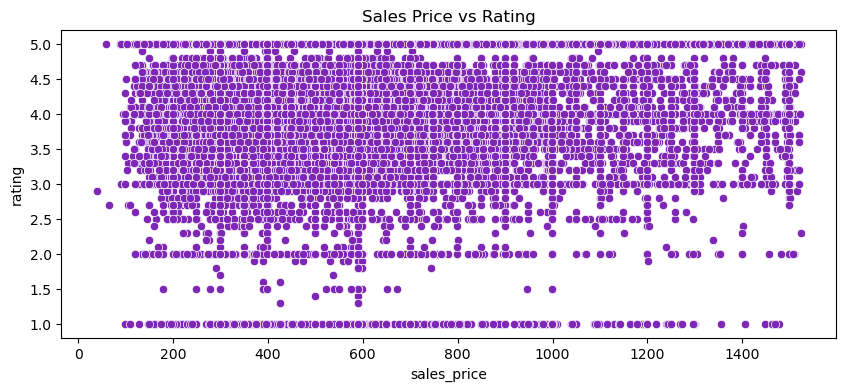

In [15]:
# Rating vs Sales Price
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_main, x='sales_price', y='rating',color="#7E27B7")
plt.title("Sales Price vs Rating")
plt.show()

#### Sales Price Distribution by Brand

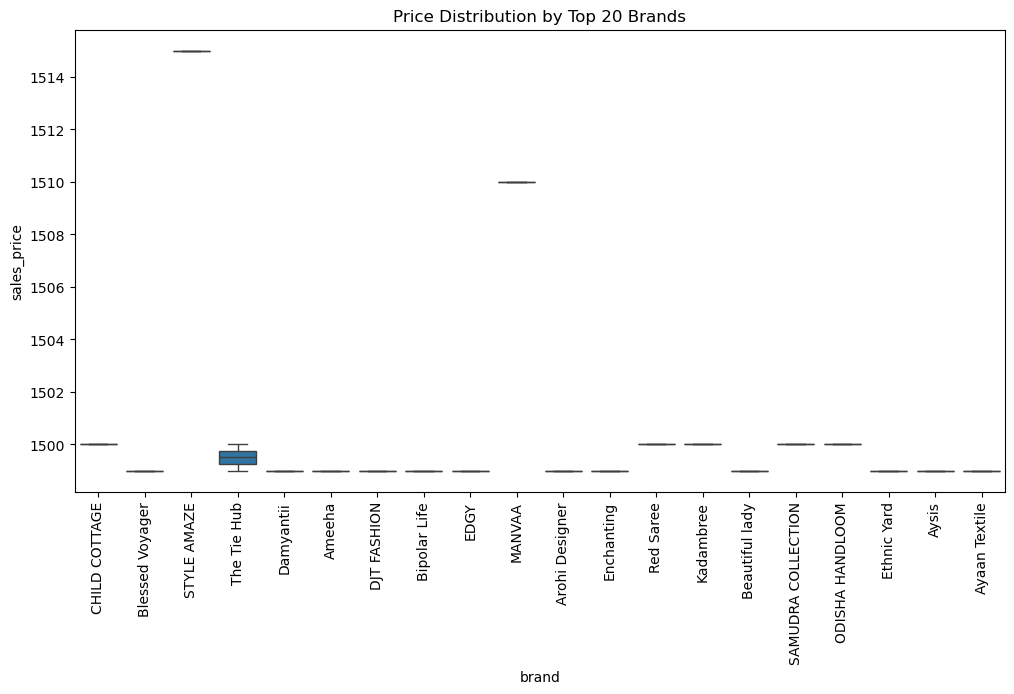

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 20 brands by average sales price
top_20_brands = df_main.groupby('brand')['sales_price'].mean().nlargest(20).index
df_top_20 = df_main[df_main['brand'].isin(top_20_brands)]

# Plotting the boxplot for top 20 brands
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_20, x='brand', y='sales_price')
plt.xticks(rotation=90)
plt.title("Price Distribution by Top 20 Brands")
plt.show()


#### Distribution of Product Ratings

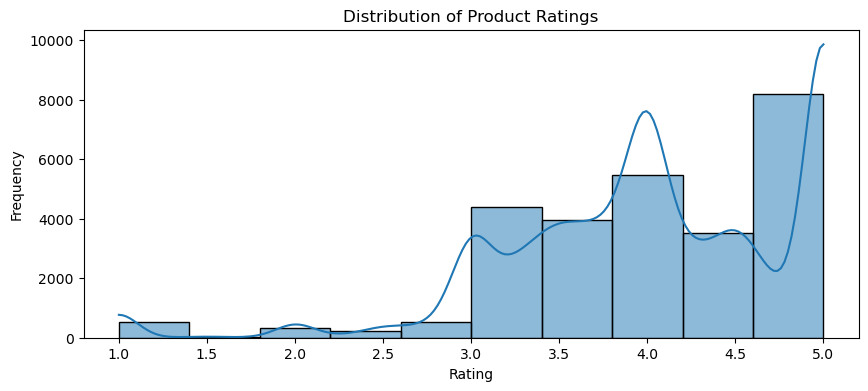

In [17]:
plt.figure(figsize=(10, 4))
sns.histplot(df_main['rating'], bins=10, kde=True)
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

#### Plotting the top 10 products by price

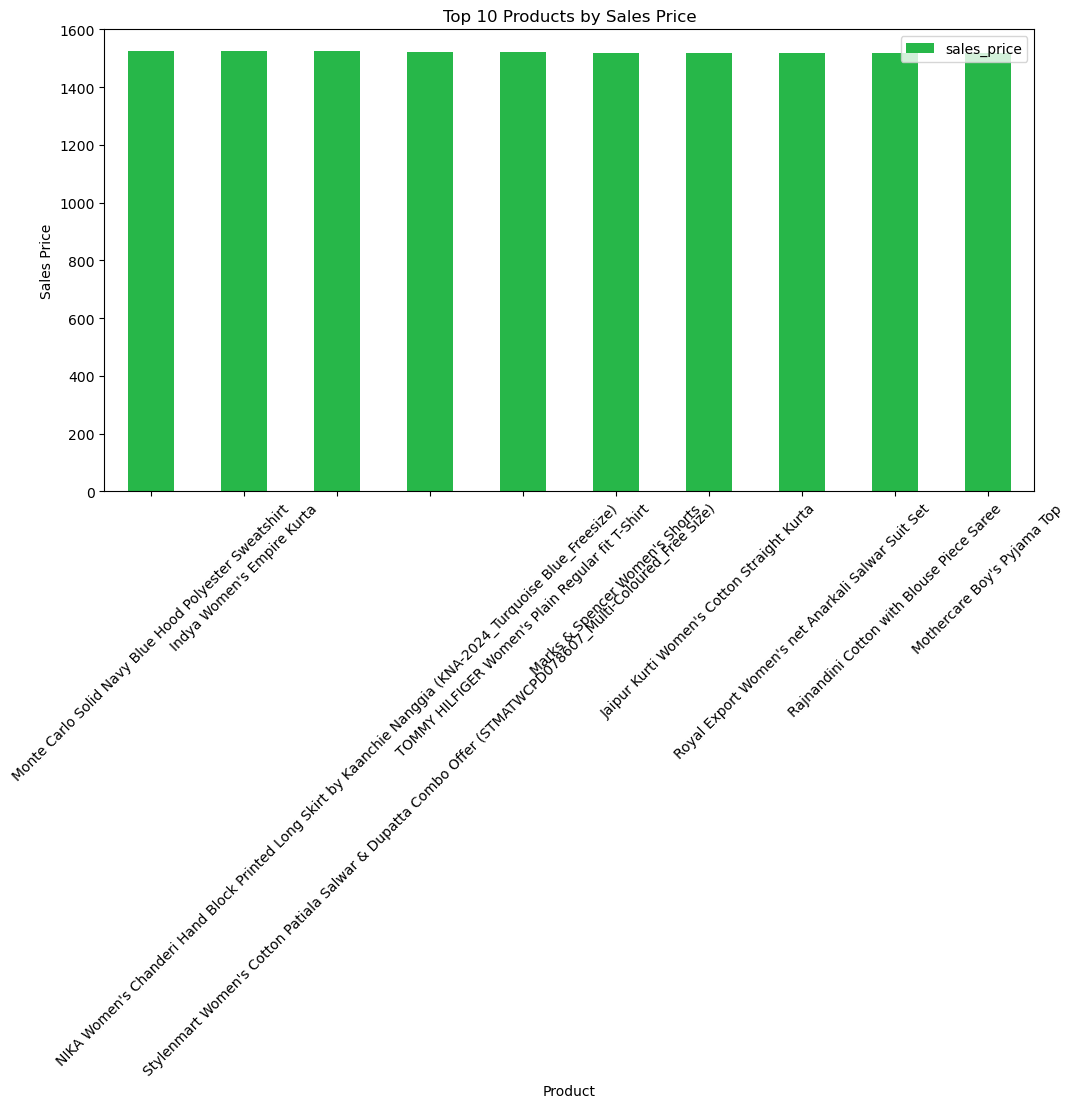

In [18]:
# Sorting by 'sales_price' and selecting top 10 products
df_top_products = df_main.sort_values('sales_price', ascending=False).head(10)

# Plotting the top 10 products by price
df_top_products.plot(kind='bar', x='product_name', y='sales_price', figsize=(12, 6), color='#27B749')
plt.title("Top 10 Products by Sales Price")
plt.xlabel('Product')
plt.ylabel('Sales Price')
plt.xticks(rotation=45)
plt.show()


#### Plotting the top 10 rated products

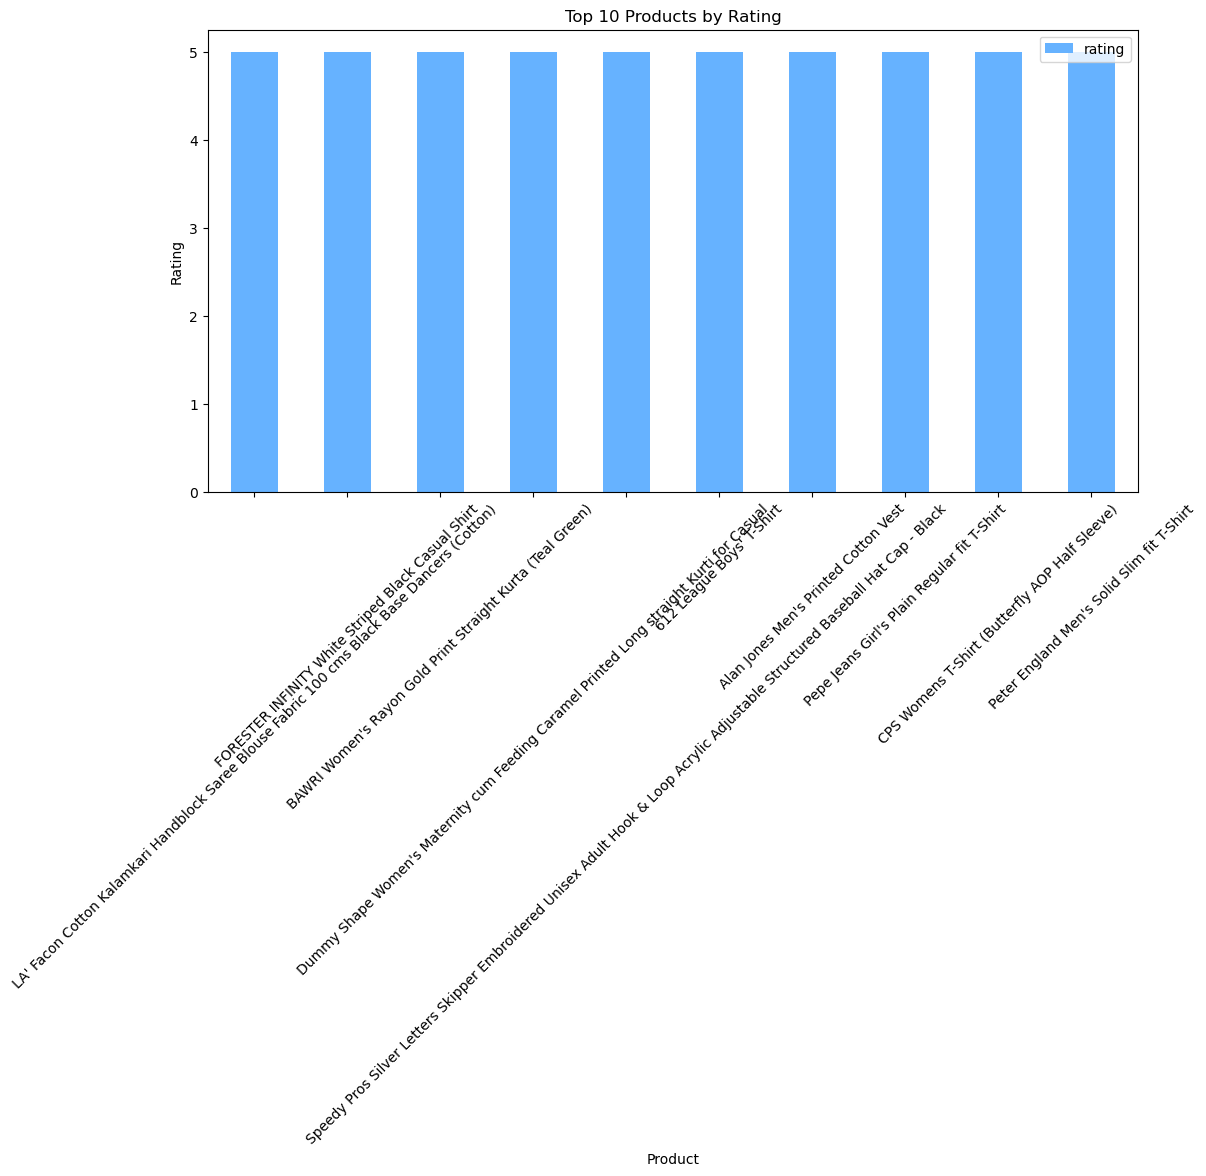

In [19]:
# Sorting by 'rating' and selecting top 10 products
df_top_rated = df_main.sort_values('rating', ascending=False).head(10)

# Plotting the top 10 rated products
df_top_rated.plot(kind='bar', x='product_name', y='rating', figsize=(12, 6), color='#66B2FF')
plt.title("Top 10 Products by Rating")
plt.xlabel('Product')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


#### Top 10 Brands by Average Sales Price and Rating

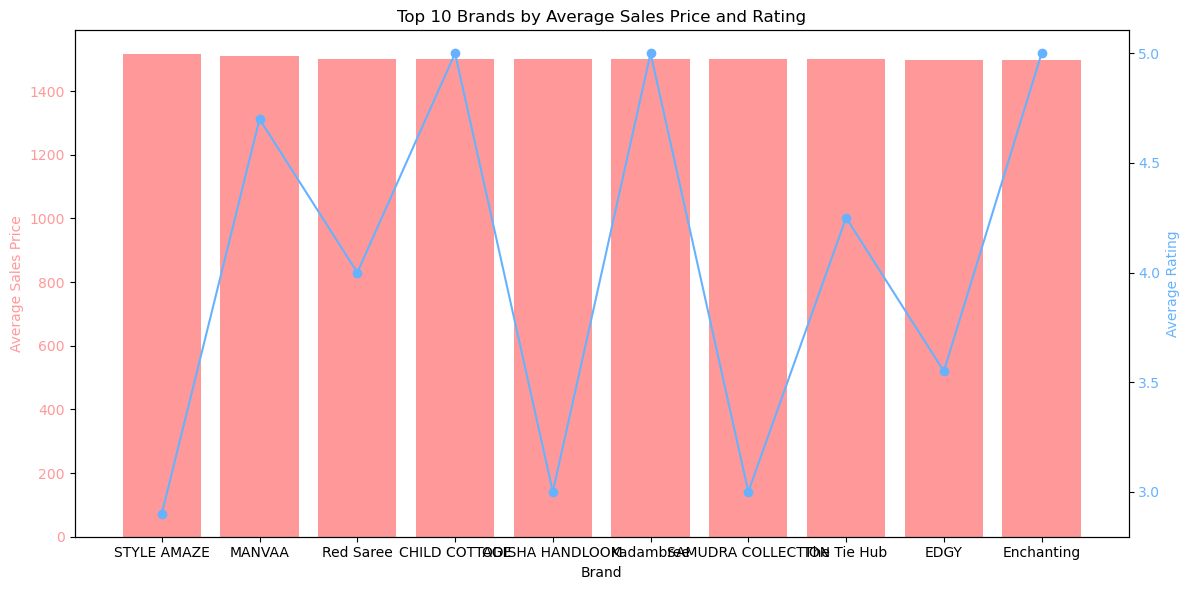

In [20]:
# Group by 'brand' and calculate the average 'sales_price' and 'rating'
df_brand_price_rating = df_main.groupby('brand').agg({'sales_price': 'mean', 'rating': 'mean'}).sort_values('sales_price', ascending=False).head(10)

# Plotting the results with two y-axes for better visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting sales price on the left y-axis
ax1.bar(df_brand_price_rating.index, df_brand_price_rating['sales_price'], color='#FF9999', label='Sales Price')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Average Sales Price', color='#FF9999')
ax1.tick_params(axis='y', labelcolor='#FF9999')

# Create a second y-axis to plot the rating
ax2 = ax1.twinx()
ax2.plot(df_brand_price_rating.index, df_brand_price_rating['rating'], color='#66B2FF', marker='o', label='Rating')
ax2.set_ylabel('Average Rating', color='#66B2FF')
ax2.tick_params(axis='y', labelcolor='#66B2FF')

# Title and layout
plt.title("Top 10 Brands by Average Sales Price and Rating")
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

#### Heatmap of Average Sales Price and Rating by Brand

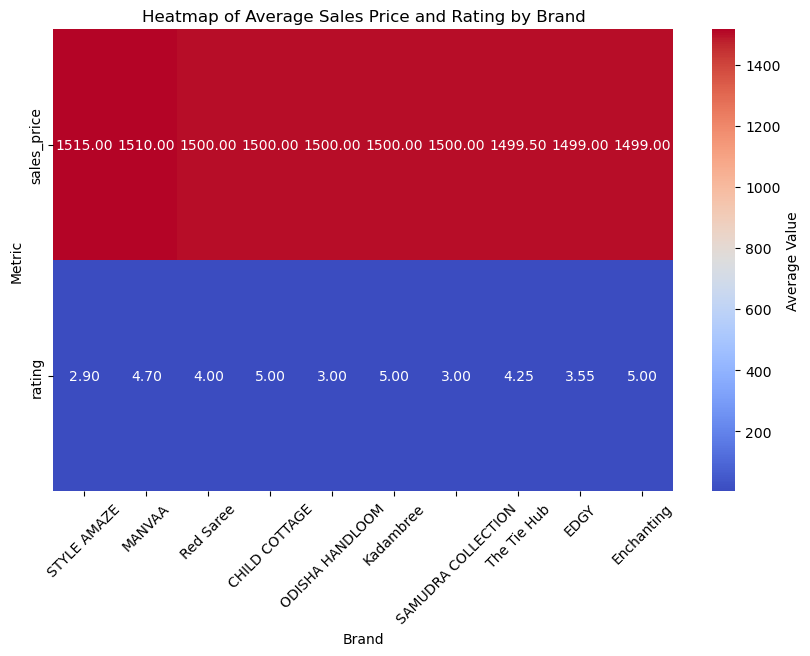

In [21]:
# Group by 'brand' and calculate the average 'sales_price' and 'rating'
df_brand_price_rating = df_main.groupby('brand').agg({'sales_price': 'mean', 'rating': 'mean'}).sort_values('sales_price', ascending=False).head(10)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_brand_price_rating.T, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Average Value'})
plt.title('Heatmap of Average Sales Price and Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Metric')
plt.xticks(rotation=45)
plt.show()

#### Plotting a heatmap for correlation between numerical columns

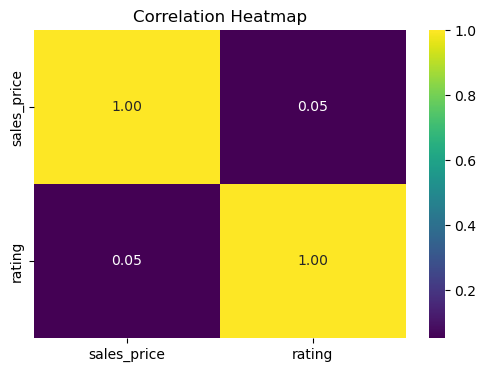

In [22]:
# Plotting a heatmap for correlation between numerical columns
plt.figure(figsize=(6,4))
sns.heatmap(df_main[['sales_price', 'rating']].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### Violin plot

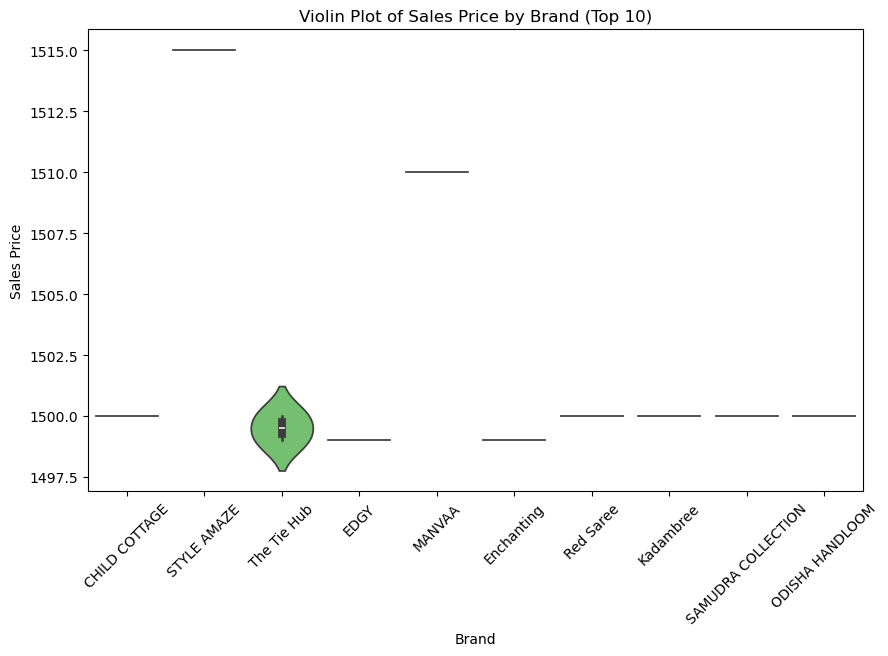

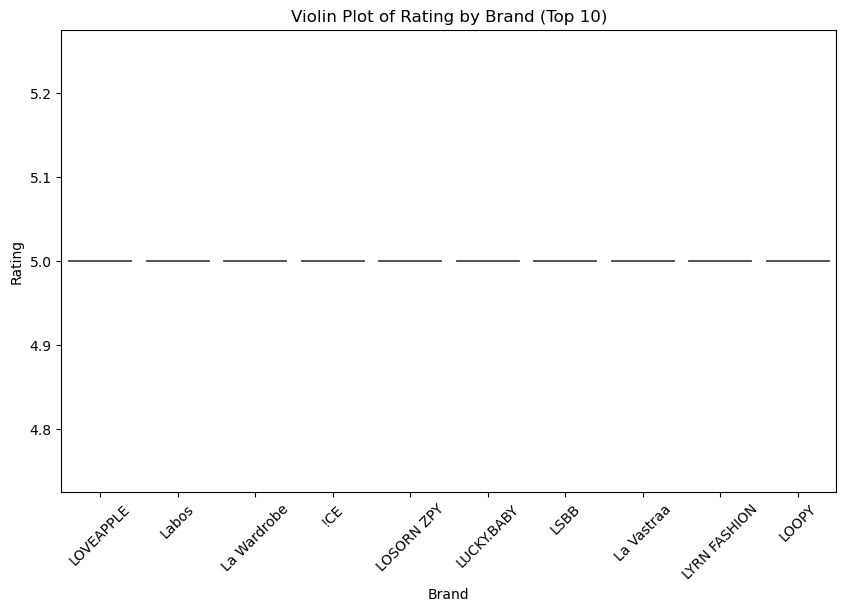

In [39]:

# Get top 10 brands based on average sales_price
top_10_brands_sales = df_main.groupby('brand')['sales_price'].mean().sort_values(ascending=False).head(10).index
df_top_10_sales = df_main[df_main['brand'].isin(top_10_brands_sales)]

# Violin plot for 'sales_price' by 'brand' for top 10 brands
plt.figure(figsize=(10, 6))
sns.violinplot(x='brand', y='sales_price', data=df_top_10_sales, hue='brand', palette='muted', legend=False)
plt.title('Violin Plot of Sales Price by Brand (Top 10)')
plt.xlabel('Brand')
plt.ylabel('Sales Price')
plt.xticks(rotation=45)
plt.show()

# Get top 10 brands based on average rating
top_10_brands_rating = df_main.groupby('brand')['rating'].mean().sort_values(ascending=False).head(10).index
df_top_10_rating = df_main[df_main['brand'].isin(top_10_brands_rating)]

# Violin plot for 'rating' by 'brand' for top 10 brands
plt.figure(figsize=(10, 6))
sns.violinplot(x='brand', y='rating', data=df_top_10_rating, hue='brand', palette='muted', legend=False)
plt.title('Violin Plot of Rating by Brand (Top 10)')
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

#### Pair plot for 'sales_price', 'rating'

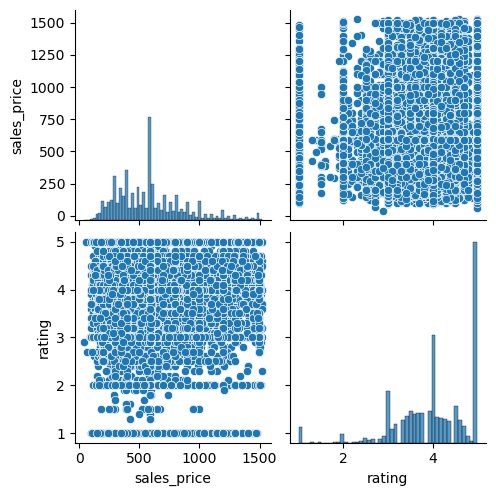

In [23]:
# Pair plot for 'sales_price', 'rating', and other numerical variables
sns.pairplot(df_main[['sales_price', 'rating']])
plt.show()


#### Correlation matrix between numerical columns (e.g., 'sales_price' and 'rating')

In [24]:
# Correlation matrix between numerical columns (e.g., 'sales_price' and 'rating')
correlation_matrix = df_main[['sales_price', 'rating']].corr()
print(correlation_matrix)


             sales_price    rating
sales_price     1.000000  0.053052
rating          0.053052  1.000000


###  Remove Stopwords and Special Characters from product_name

In [25]:
import nltk
from nltk.corpus import stopwords
import re

# Download stopwords if you haven't already
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define function to clean product names
def clean_product_name(name):
    name = re.sub(r'[^\w\s]', '', name)  # Remove punctuation
    name = ' '.join([word for word in name.split() if word.lower() not in stop_words])  # Remove stopwords
    return name

# Apply the function to the product_name column
df_main['product_name'] = df_main['product_name'].apply(clean_product_name)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### Remove Non-English Words

In [27]:
pip install langdetect


     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 10.2/981.5 kB ? eta -:--:--
     - ----------------------------------- 30.7/981.5 kB 262.6 kB/s eta 0:00:04
     - ----------------------------------- 30.7/981.5 kB 262.6 kB/s eta 0:00:04
     - ----------------------------------- 30.7/981.5 kB 262.6 kB/s eta 0:00:04
     --- --------------------------------- 92.2/981.5 kB 403.5 kB/s eta 0:00:03
     --- --------------------------------- 92.2/981.5 kB 403.5 kB/s eta 0:00:03
     ------ ----------------------------- 174.1/981.5 kB 499.5 kB/s eta 0:00:02
     -------- --------------------------- 225.3/981.5 kB 625.1 kB/s eta 0:00:02
     ----------- ------------------------ 307.2/981.5 kB 703.7 kB/s eta 0:00:01
     -------------- --------------------- 389.1/981.5 kB 807.8 kB/s eta 0:00:01
     ----------------- ------------------ 481.3/981.5 kB 912.9 kB/s eta 0:00:01
     ---------------------- --------------- 583.7/981

In [ ]:
from langdetect import detect, LangDetectException

# Filter non-English product names safely
def detect_language(text):
    try:
        # Ensure text is not null or too short
        if text and len(text.strip()) > 5:  # Only check text longer than 5 characters
            return detect(text) == 'en'
        return False
    except LangDetectException:
        return False

# Apply the function
df_main = df_main[df_main['product_name'].apply(detect_language)]


### Converting short forms to their corresponding long forms

In [36]:
import re

# Dictionary of common short forms and their corresponding long forms
abbreviations = {
    "T-Shirt": "Tee Shirt",
    "Unisex": "Unisex Clothing",
    "Mens": "Men's",
    "Womens": "Women's",
    "Gym Wear": "Gym Wear Clothing",
    "Casual": "Casual Wear",
    "Fit": "Fitted",
    "Reg": "Regular",
    "Polo": "Polo Shirt",
    "Shirt": "Shirt",
    "S/S": "Short Sleeve",
    "L/S": "Long Sleeve",
    "Belt": "Belt Accessory"
}

# Function to replace abbreviations with long forms
def replace_abbreviations(product_name):
    for short, long in abbreviations.items():
        # Using regex to replace words only if they match exactly (case-insensitive)
        product_name = re.sub(rf'\b{short}\b', long, product_name, flags=re.IGNORECASE)
    return product_name

# Apply the function to the 'product_name' column
df_main['product_name'] = df_main['product_name'].apply(replace_abbreviations)

# Display the updated product names to confirm changes
print(df_main['product_name'].head(10))


0     LA Facon Cotton Kalamkari Handblock Saree Blou...
1     Sf Jeans Pantaloons Men's Plain Slim Fitted TS...
2     LOVISTA Cotton Gota Patti Tassel Traditional P...
3            People Men's Printed Regular Fitted TShirt
5     Forest Club Gym Wear Clothing Clothing Sports ...
6     PrintOctopus Graphic Printed TShirt Men Chill ...
7     Pepe Jeans Men's Solid Regular Fitted Casual W...
8     Carahere Boys Handmade PreTied Classic Polka D...
9                            Peppermint Synthetic Dress
10    Toddler Little Boy Straight Outta Timeout Long...
Name: product_name, dtype: object


In [31]:
from nltk.stem import PorterStemmer, SnowballStemmer

# Initialize stemmers
porter = PorterStemmer()
snowball = SnowballStemmer("english")

# Sample words
words = ["running", "jumps", "easily", "fairly"]

# Apply stemming
stemmed_porter = [porter.stem(word) for word in words]
stemmed_snowball = [snowball.stem(word) for word in words]

print("Porter Stemmer:", stemmed_porter)
print("Snowball Stemmer:", stemmed_snowball)


Porter Stemmer: ['run', 'jump', 'easili', 'fairli']
Snowball Stemmer: ['run', 'jump', 'easili', 'fair']


In [33]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laksh\AppData\Roaming\nltk_data...


True

In [34]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Sample words
words = [("running", wordnet.VERB), ("jumps", wordnet.NOUN), ("easily", wordnet.ADV), ("fairly", wordnet.ADV)]

# Apply lemmatization
lemmatized_words = [lemmatizer.lemmatize(word, pos=pos) for word, pos in words]
print("Lemmatized Words:", lemmatized_words)


Lemmatized Words: ['run', 'jump', 'easily', 'fairly']
